# Quandle algebra derivation algebra computation using permutations

## Libraries

In [1]:
from sympy.combinatorics import Permutation, PermutationGroup
from sympy.combinatorics.generators import symmetric
from sympy import init_printing, linsolve
from sympy.matrices import Matrix
from sympy.printing.latex import latex
from sympy import *
import time as time
import numpy as np
init_printing()
def f(P,i,j):
    return ~P[j]*P[i]*P[j]

## Derivation algebra on an $n$-dimensional symmetric group conjugation quandle

In [2]:
n = 3

1. Construct a dictionary made up of the symmetric group's elements and their cycle structures
2. Order it, so that conjugacy classes are grouped together
3. Compute the Cayley table

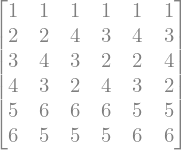

In [3]:
test = {a:str({key:(a.cycle_structure)[key] for key in sorted((a.cycle_structure).keys(),reverse=True)}) 
        for a in list(symmetric(n))}

d = {m:[k for k in test.keys() if test[k] == m] for m in sorted(set(test.values()))}
P = flatten([k for k in d.values()])

D = len(P)
C_N = np.array([[f(P,i,j) for j in range(D)] for i in range(D)])
for i in range(D):
    C_N = np.where(C_N==P[i],i+1,C_N)
C_N = Matrix(C_N)

Q = Matrix(D, 1, lambda i,j:var('e_{%d}' % (i+1)))
A = Matrix(D, D, lambda i,j:var('c^{%d}_{%d}' % (i+1,j+1)))
C_Q = Matrix([[Q[C_N[j,i]-1] for i in range(D)] for j in range(D)])
C_N

```C_N2``` is the Cayley table of the "inverse" operation $\lhd$, so we could obtain the left inverse $a$ of each pair $c,b$ in $a\rhd c = b$.

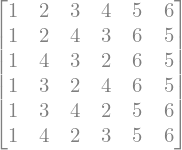

In [4]:
C_N2 = Matrix([[[i+1 for i in range(D) if C_N[i,j]==k+1][0] for k in range(D)] for j in range(D)])
C_N2

Loop to check if $(a\lhd b)\rhd a = b$

Finally we define an array made up of the possible right inverses $c$ of each pair $a,b$ in $a\rhd c =b$.

In [5]:
J = [[[j for j in range(D) if C_N[i,j]==k+1] for i in range(D)] for k in range(D)]
J

Finally we use the characterization of derivation
$$ c^k_{i\rhd j} = c^{j\lhd k}_i + \sum_{l:\,i\rhd l = k} c^l_j $$
to find all symmetries on the derivation algebra.

Uncomment to see all the resulting equations printed.

In [6]:
test = [[[A[k,C_N[i,j]-1]-A[C_N2[j,k]-1,i]-sum(A[J[i][k],j]) for i in range(D)] for j in range(D)] for k in range(D)]
test2 = set([i.args for i in flatten(test)])

The function ```solve``` is used instead of ```linsolve``` even though all equations are linear, because ```linsolve``` does not always fully solve these systems.

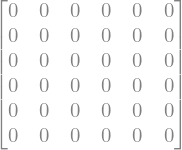

In [7]:
R = flatten(A)
R.reverse()
s = solve(flatten(test),R,dict=True)[0]
A2 = A
for i in range(len(flatten(A))):
    try:
        A2[i] = s[flatten(A)[i]]
    except: 
        pass
A2

## Derivation algebras on other permutation-based conjugation quandles

The following code block defines two functions: the first one returns the Cayley table of the conjugation quandle on a permutation group, the second takes that Cayley table and computes the derivation algebra of the conjugation quandle.

In [8]:
def CayleyPerm(P):
    D = len(P)
    C_N = np.array([[f(P,i,j) for j in range(D)] for i in range(D)])
    for i in range(D):
        C_N = np.where(C_N==P[i],i+1,C_N)
    C_N = Matrix(C_N)
    return C_N

def DerivationMatrix(C_N):
    D = C_N.shape[0]
    A = Matrix(D, D, lambda i,j:var('c^{%d}_{%d}' % (i+1,j+1)))
    C_N2 = Matrix([[[i+1 for i in range(D) if C_N[i,j]==k+1][0] for k in range(D)] for j in range(D)])
    J = [[[j for j in range(D) if C_N[i,j]==k+1] for i in range(D)] for k in range(D)]
    test = [[[A[k,C_N[i,j]-1]-A[C_N2[j,k]-1,i]-sum(A[J[i][k],j]) for i in range(D)] for j in range(D)] for k in range(D)]
    return list([flatten(test),A])

The current list of permutation groups contains all subgroups of the symmetric group $S^4$. The loop prints their Cayley tables and derivation algebra characterizations in order.

PermutationGroup([
    (3)(1 2)]) 
Quandle Cayley table:


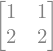

Derivation matrix


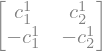

PermutationGroup([
    (0 3)(1 2)]) 
Quandle Cayley table:


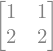

Derivation matrix


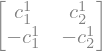

PermutationGroup([
    (0 1 2 3)]) 
Quandle Cayley table:


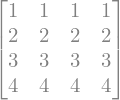

Derivation matrix


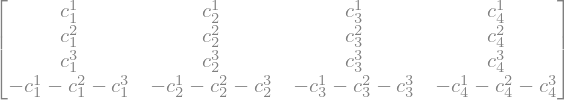

PermutationGroup([
    (0 3)(1 2),
    (0 2)(1 3),
    (0 1)(2 3)]) 
Quandle Cayley table:


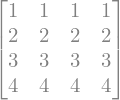

Derivation matrix


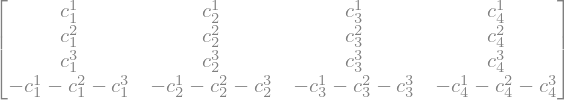

PermutationGroup([
    (3)(1 2),
    (0 3)]) 
Quandle Cayley table:


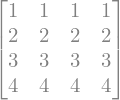

Derivation matrix


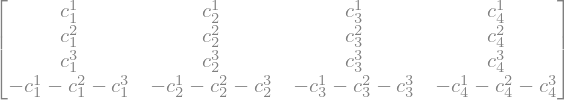

PermutationGroup([
    (0 1 2 3),
    (1 3)]) 
Quandle Cayley table:


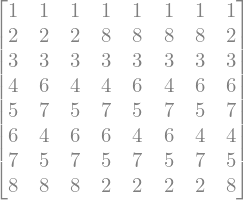

Derivation matrix


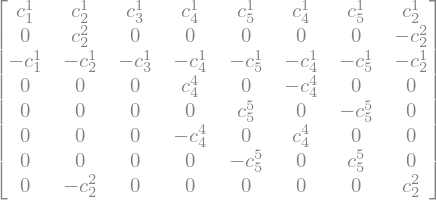

PermutationGroup([
    (1 2 3),
    (1 3 2)]) 
Quandle Cayley table:


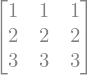

Derivation matrix


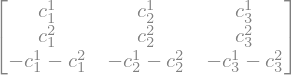

PermutationGroup([
    (1 2 3),
    (3)(1 2)]) 
Quandle Cayley table:


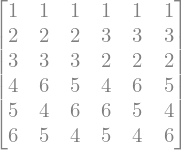

Derivation matrix


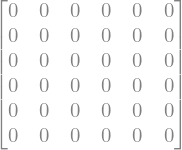

PermutationGroup([
    (1 2 3),
    (0 3)(1 2)]) 
Quandle Cayley table:


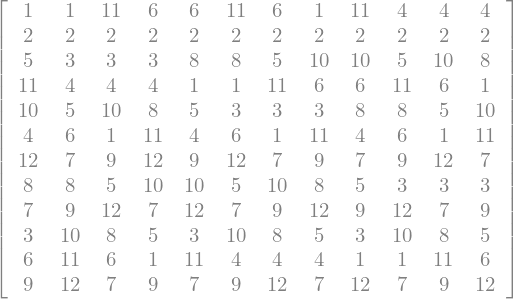

Derivation matrix


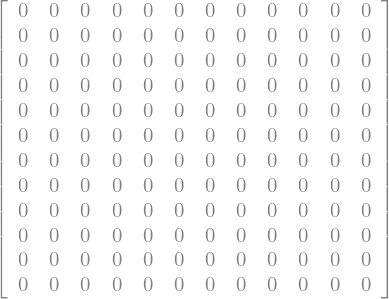

In [9]:
S4_SG = list([PermutationGroup(Permutation([],size=4),Permutation([[1,2]],size=4)),
             PermutationGroup(Permutation([],size=4),Permutation([[1,2],[3,0]])),
             PermutationGroup(Permutation([1,2,3,0])),
             PermutationGroup(Permutation([],size=4),Permutation([[1,2],[3,0]]),
                              Permutation([[1,3],[2,0]]),Permutation([[1,0],[2,3]])),
             PermutationGroup(Permutation([[1,2]],size=4),Permutation([[3,0]],size=4)),
             PermutationGroup(Permutation([1,2,3,0]),Permutation([[1,3]],size=4)),
             PermutationGroup(Permutation([[3]]),Permutation([[1,2,3]]),Permutation([[1,3,2]])),
             PermutationGroup(Permutation([[1,2,3]]),Permutation([[1,2],[3]])),
             PermutationGroup(Permutation([[1,2,3]]),Permutation([[1,2],[0,3]]))])

for PG in S4_SG:
    print(PG,"\nQuandle Cayley table:")
    C_N = CayleyPerm(PG._elements)
    display(C_N)
    D = DerivationMatrix(C_N)
    A = D[1]
    R = flatten(A)
    #display(A)
    R.reverse()
    s = solve(D[0],R,dict=True)[0]
    #print(s)
    A2 = A
    for i in range(len(flatten(A))):
        try:
            A2[i] = s[flatten(A)[i]]
        except: 
            pass
    print("Derivation matrix")
    display(A2)

## Derivation algebras of dihedral conjugation quandles

The dihedral conjugation quandle can be described using four equations which are utilized in the following list comprehension.

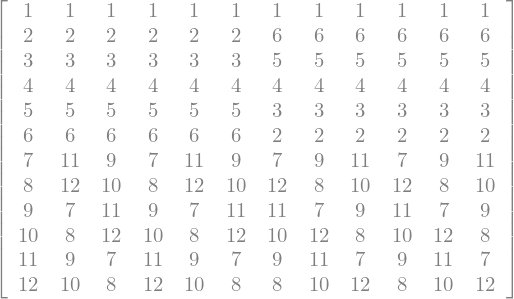

In [10]:
D = 6
Test = [[a+1 if a<D and b<D else -a%D+1 if a<D else D+(a-2*b)%D+1 if b<D else D+(2*b-a)%D+1 for b in range(2*D)] for a in range(2*D)]
Matrix(Test)

Then the derivation algebra is computed as before.

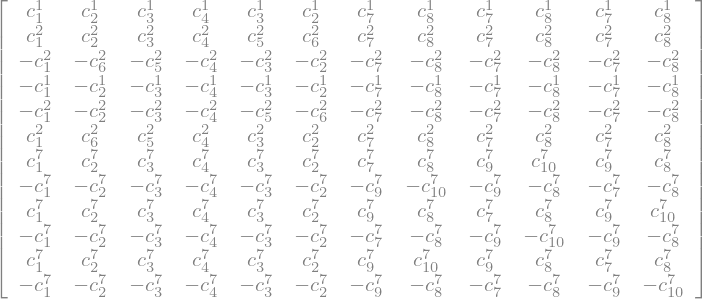

In [11]:
De = DerivationMatrix(Matrix(Test))
A = De[1]
R = flatten(A)
R.reverse()
s = solve(De[0],R,dict=True)[0]
#print(s)
A2 = A
for i in range(len(flatten(A))):
    try:
        A2[i] = s[flatten(A)[i]]
    except: 
        pass
display(A2)

A loop has been included to automatically find a series of conjugation quandle algebra derivation algebras.

Derivation matrix  2


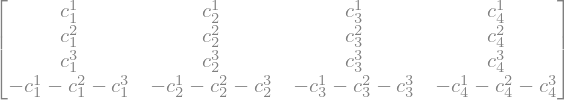

Derivation matrix  3


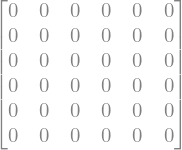

Derivation matrix  4


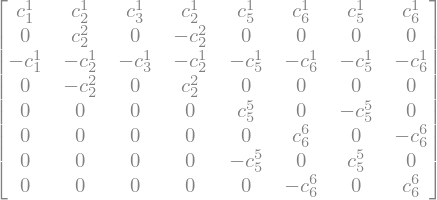

Derivation matrix  5


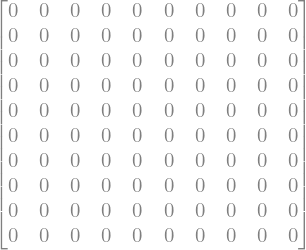

Derivation matrix  6


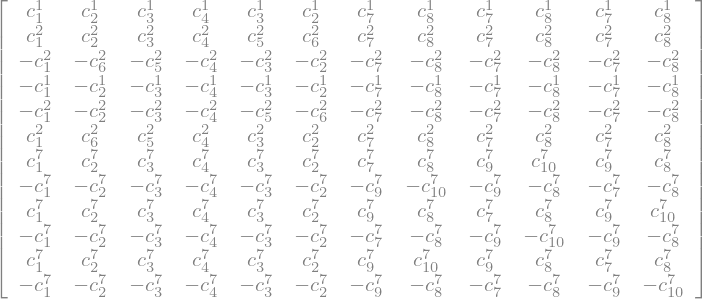

Derivation matrix  7


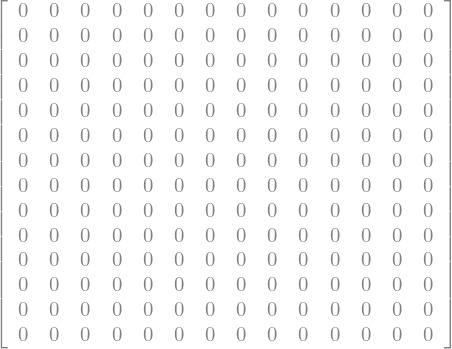

Derivation matrix  8


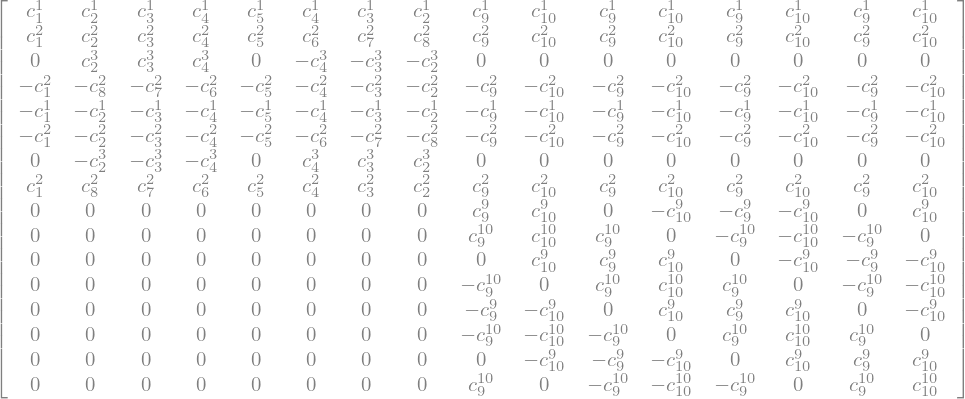

Derivation matrix  9


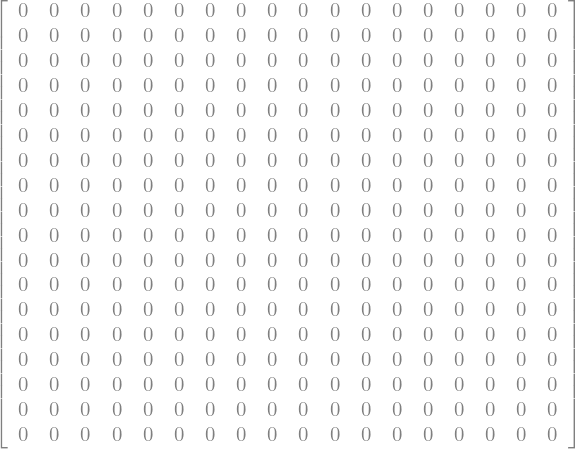

Derivation matrix  10


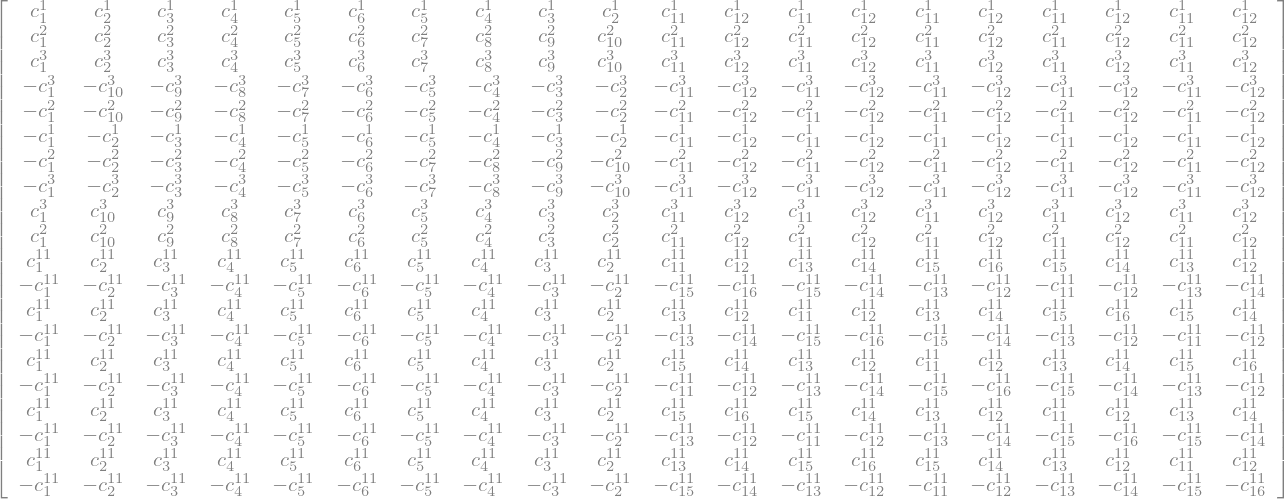

Derivation matrix  11


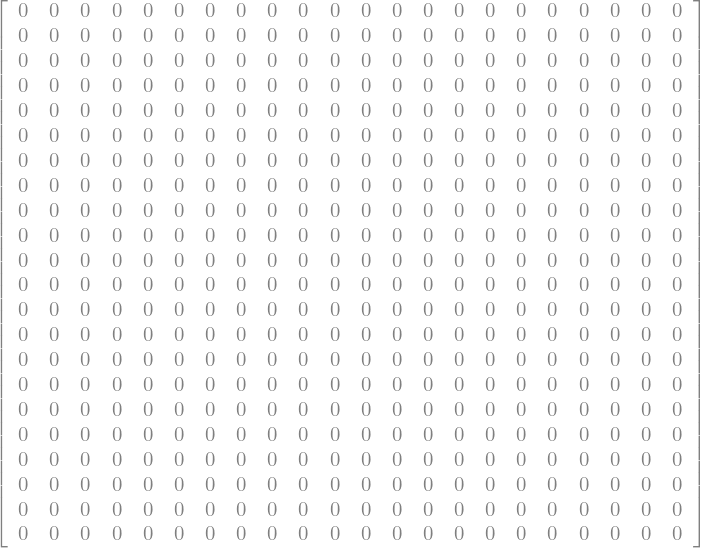

Derivation matrix  12


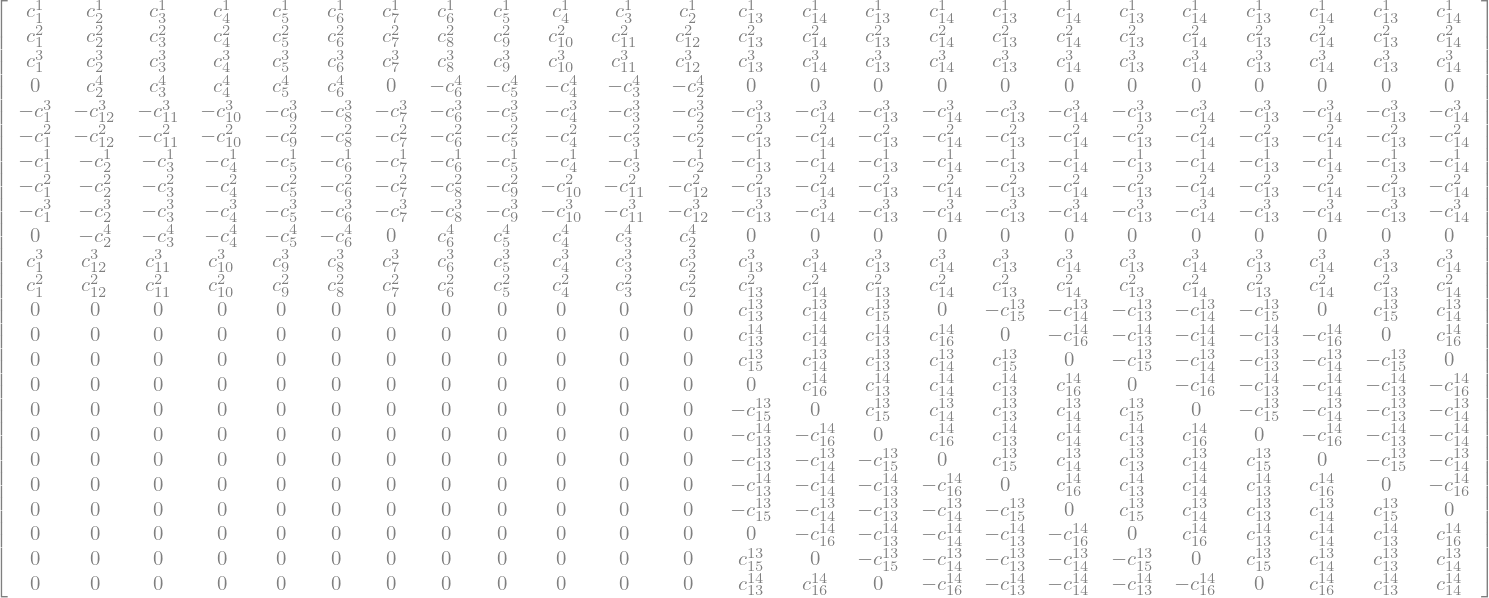

In [12]:
for D in range(2,13):
    Test = [[a+1 if a<D and b<D else -a%D+1 if a<D else D+(a-2*b)%D+1 if b<D else D+(2*b-a)%D+1 for b in range(2*D)] for a in range(2*D)]
    De = DerivationMatrix(Matrix(Test))
    A = De[1]
    R = flatten(A)
    #display(A)
    R.reverse()
    s = solve(De[0],R,dict=True)[0]
    #print(s)
    A2 = A
    for i in range(len(flatten(A))):
        try:
            A2[i] = s[flatten(A)[i]]
        except: 
            pass
    print("Derivation matrix ",D)
    display(A2)